# 목차

1. 시계열 데이터 준비  
2. 각종 전처리 수행
3. 시계열 안전성 분석
  - 정성적 분석
  - 정량적 분석
***
4. 학습, 테스트 데이터셋 생성
5. 적정 ARIMA 모수 찾기
6. ARIMA 모델 훈련과 테스트
***    
    

목차는 2가지로 part로 나눌 수 있다   
1) 시계열 데이터의 안전성 확인과 안정적으로 변환  
2) 모수 결정으로 ARIMA 성능 높히기

# 학습목표

* 시계열 안정성과 그 분석
* ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념

## 시계열 안정성

안정적 = 시계열 데이터의 통계적 특성이 변하지 않는다 = 시간의 변화에 무관하게 일정한 프로세스가 존재한다  
안정적인 시계열에서는 시간의 추이와 관계없이 평균, 분산, 공분산이 일정해야한다  
  
예를 들어    
2010의 데이터로 2011를 정확하게 예측하는 모델이라면  
2020의 데이터로 2021도 정확하게 예측할 수 있어야 안정한 시계열 데이터라고 할 수 있다    
그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 합니다.  
(그렇지 않은 데이터에 대해서는 로그변환이나, 주기적인 변화가 있는 데이터라면 계절성을 상쇄시켜서 예측할 수 있게 할 것이다.)  

## AR + I + MA

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average, 3가지가 합쳐진 모델이다.  
* AR(자기회귀)  
  -> 주식의 값이 일정한 평균을 유지할 것이라고 예측하는 관점  
  -> 예) '삼성전기 우선주가 오늘은 떨어졌지만(실화임) 장기적으로는 일정할테니까 안팔아야지'   
  
  
* I(차분누적)  
  -> 계절성에 해당하는 부분을 모델링하는데 AR 과 MA 사이의 적정 가중치를 찾는 일을 합니다.  
  
  
* MA(이동평균)  
  -> 최근의 증감 패턴이 지속될 것이라고 예측하는 관점
  -> 예) '카카오가 계속 오르니까 목표 매도액을 올려야겠는걸?'  
  
  
이런 세가지 모델에 해당하는 파라미터도 3가지이다. AR I MA의 순서대로 p, d, q이다  
이때 d는 몇차 차분을 했는지를 나타내고  
p,q는 통상적으로 p + q < 2, p * q = 0 인 값들을 사용한다고 했다  
그 이유는 날씨데이터처럼 AR의 경향이 강하거나 삼성주식처럼 MA의 경향이 강하기 때문이라고 설명했다.

**모수결정**(이 부분은 코드를 돌려보면서 더 이해가 가지 않았다)    
이렇게 어려운 p, q는 ACF와 PACF를 통해 결정할 수 있다  
ACF의 그래프가 점차 감소하는 부분의 숫자로 경정할수 있고, 이미 감소하고 있다면 q=0으로 둘 수 있다  
PACF의 그래프에서 p를 초과한 부분이 0과 가까워지고 있다면 p를 결정할 수 있다  
  

# KIA, NCsoft, Hyundai

# KIA

## STEP 1 : 시계열 데이터 준비

### csv -> dataframe -> series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# csv -> dataframe
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/kia.csv' 
kia = pd.read_csv(dataset_filepath) 
print(type(kia))
kia.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.034668,636300.0
1,2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100.0
2,2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031738,379000.0
3,2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.458984,701400.0
4,2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700.0


In [8]:
# ind를 Date로 변경
kia = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(kia))
kia.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.034668,636300.0
2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100.0
2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031738,379000.0
2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.458984,701400.0
2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700.0


In [9]:
# dataframe -> series
kia = kia['Close']
print(type(kia))
kia.head()

<class 'pandas.core.series.Series'>


Date
2000-01-04    7665.241699
2000-01-05    7248.085449
2000-01-06    6935.218262
2000-01-07    6778.785156
2000-01-10    7091.651855
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

### 결측치

In [10]:
kia[kia.isna()]

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

보간(interpolate) 대입

결측치 : Series([], Name: Close, dtype: float64)


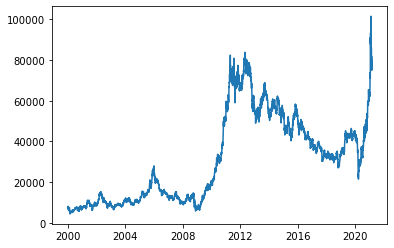

In [39]:
# 보간 기준은 'time'
kia = kia.interpolate(method='time')

print('결측치 :', kia[kia.isna()])

plt.plot(kia)

### 로그 변환

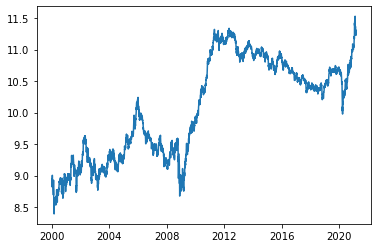

In [31]:
kia_log = np.log(kia)
plt.plot(kia_log)

In [40]:
kia_log[kia_log.isna()]

Series([], Name: Close, dtype: float64)

## STEP 3 : 시계열 안정성 분석

### 정성적 분석

구간 통계치를 시각화해보기  
반복되는 window size를 에 맞춰서 이동평균 구하고  
그에 따른 이동표준편차까지 구해서  
하나의 그래프에 그리기

In [10]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()
    
    plt.figure(figsize=(17,10))
    orig = plt.plot(timeseries, color='b', label='Original_log')
    mean = plt.plot(rolmean, color='r', label='Rolling mean')
    std = plt.plot(rolstd, color='g', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Rolling std')
    plt.show(block=False)

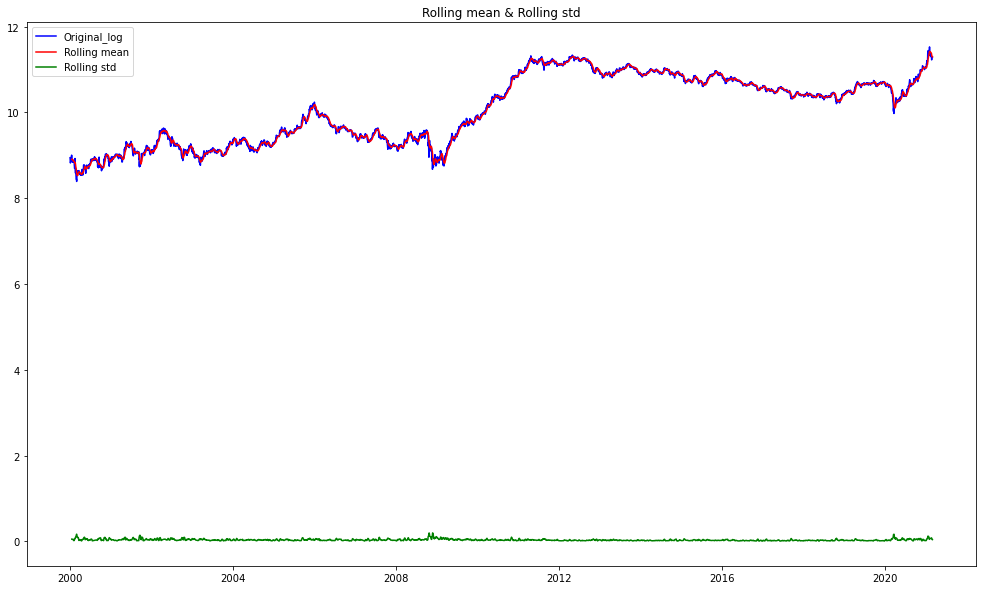

In [29]:
plot_rolling_statistics(kia_log, window=12)

### 정량적 분석

seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리하기

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(kia_log)

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

#### problem 1 
위의 코드에서 에러가 났다  
kia_log에 무슨 문제가 있는 걸까?  
  
#### solve 1
구글링을 해서 찾아보니  
https://insightcampus.co.kr/insightcommunity/?mod=document&uid=12855  
관측치가 일정하지 않은 시계열 데이터(즉, 주말이 일별 데이터에 누락된 경우)에서 이 문제가 발생할 수 있다.    
    
팀원들과 공유하다가 코드에 추가 인자를 넣어 해결했다

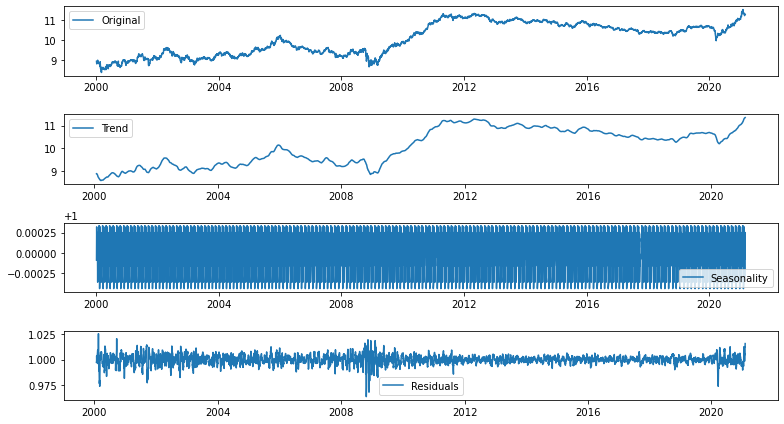

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(kia_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(11,6))
plt.subplot(411)
plt.plot(kia_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout() # 약간 정리하는 코드???

In [34]:
type(kia)

pandas.core.series.Series

In [35]:
type(kia_log)

pandas.core.series.Series

In [38]:
kia_log

Date
2000-01-04     8.944451
2000-01-05     8.888493
2000-01-06     8.844368
2000-01-07     8.821553
2000-01-10     8.866674
                ...    
2021-02-24    11.225243
2021-02-25    11.251561
2021-02-26    11.282254
2021-03-02    11.291031
2021-03-03    11.293525
Name: Close, Length: 5320, dtype: float64

**seasonal_decompose** 처럼 직진하는 방법만 말고   
돌아도 가보자 ⬇️⬇️

### ADF test

In [1]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    # 아래 index의 값들은 정해져 있고 정해진 값들에 알맞은 인덱스를 써줘야 한다 
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [43]:
augmented_dickey_fuller_test(kia)

Results of Dickey-Fuller Test:
Test Statistic                   -0.635548
p-value                           0.862746
#Lags Used                       26.000000
Number of Observations Used    5293.000000
Critical Value (1%)              -3.431586
Critical Value (5%)              -2.862086
Critical Value (10%)             -2.567061
dtype: float64


In [44]:
augmented_dickey_fuller_test(kia_log)

Results of Dickey-Fuller Test:
Test Statistic                   -1.082523
p-value                           0.721991
#Lags Used                        4.000000
Number of Observations Used    5315.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


### Trend 상쇄하기

계절적, 즉 주기적인 패턴을 상쇄  
-> How? 차분(Differencing)  
-> rolling mean에서 ts_log빼기

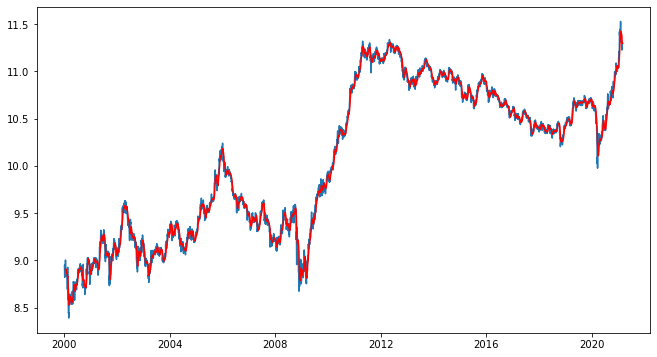

In [46]:
moving_avg = kia_log.rolling(window=12).mean()
plt.figure(figsize=(11,6))
plt.plot(kia_log)
plt.plot(moving_avg, color='r')

In [47]:
kia_log_moving_avg = moving_avg - kia_log
kia_log_moving_avg[kia_log_moving_avg.isna()]

Date
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
2000-01-10   NaN
2000-01-11   NaN
2000-01-12   NaN
2000-01-13   NaN
2000-01-14   NaN
2000-01-17   NaN
2000-01-18   NaN
Name: Close, dtype: float64

In [48]:
# 결측치 제거
kia_log_moving_avg.dropna(inplace=True)

In [53]:
# 정성적 분석 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    plt.figure(figsize=(11,6))
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

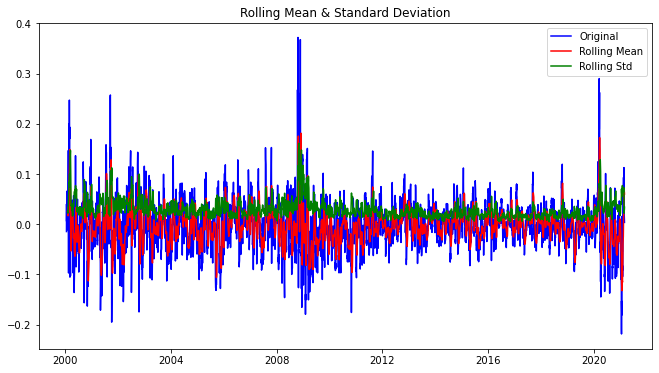

In [54]:
plot_rolling_statistics(kia_log_moving_avg, window=12)

정성적으로 판단했을 때도 0을 중심으로 진동 운동을 하는 모습을 보이고 있지만 진폭(분산)은 일정해 보이지 않는다.  
정량적으로 분석해보자.  

In [56]:
# 정량적 분석
augmented_dickey_fuller_test(kia_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -1.687402e+01
p-value                        1.075571e-29
#Lags Used                     1.300000e+01
Number of Observations Used    5.295000e+03
Critical Value (1%)           -3.431586e+00
Critical Value (5%)           -2.862086e+00
Critical Value (10%)          -2.567061e+00
dtype: float64


### p-vale 변화

0.862746 -> 0.721991 -> 1.075571e-29  
0과 아주 가까워졌다.  
유의확률이 0이랑 가까울 수록 '시계열이 불안정하다'라는 귀무가설이 기각되고  
대립가설 '시계열은 안정하다'가 채택되어  
시계열은 안정하다고 볼 수 있다.  
  
시계열이 안정하면 ARIMA에 넣어 학습시킬 수 있다.

## STEP 4 : 학습, 테스트 데이터셋 생성

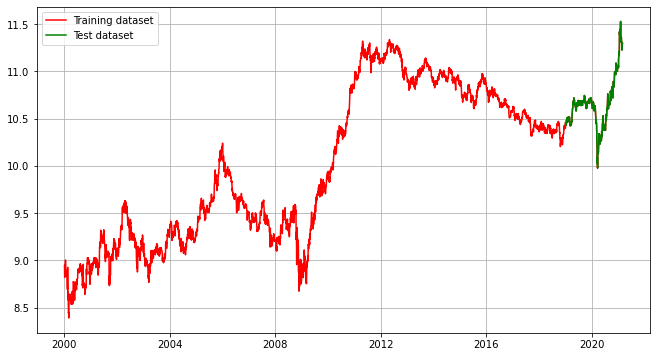

In [57]:
train_data, test_data = kia_log[:int(len(kia_log)*0.9)], kia_log[int(len(kia_log)*0.9):]
plt.figure(figsize=(11,6))
plt.grid(True)
plt.plot(kia_log, c='r', label='Training dataset')
plt.plot(test_data, c='g', label='Test dataset') # 겹쳐서 그림
plt.legend()

그래프를 딱 보고 드는 생각  
딱 테스트데이터가 코로나시작하고네, 못맞출 듯 ㅋㅋ  
코로나를 어떻게 맞춰

## STEP 5 : 적정 ARIMA 모수 찾기

<function matplotlib.pyplot.show(close=None, block=None)>

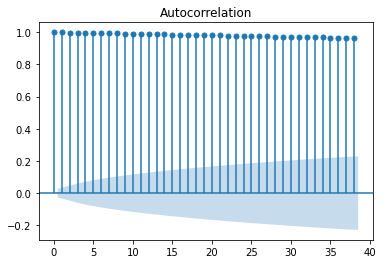

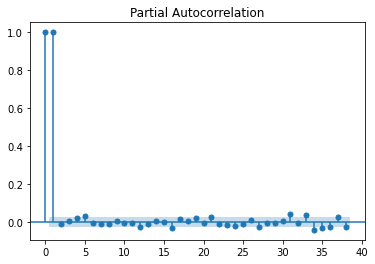

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(kia_log)  # ACF : Autocorrelation 그래프 그리기
plot_pacf(kia_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show

Results of Dickey-Fuller Test:
Test Statistic                  -38.663351
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5314.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


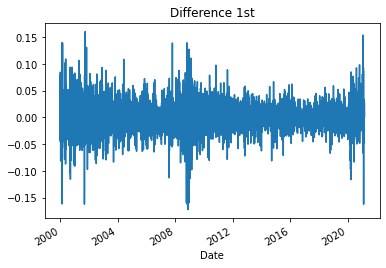

In [60]:
# 1차 차분  
diff_1 = kia_log.diff(periods=1).iloc[2:]
diff_1.plot(title ='Difference 1st')

augmented_dickey_fuller_test(diff_1)

1차 차분을 했기 때문에 d=1로 두고,  
p, q는 여러시도 끝에 가장 적은 mape 를 내는 값을 찾았다.  

In [194]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
# [[YOUR CODE]]
model = ARIMA(train_data, order=(12,1,12))
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4664
Model:               ARIMA(12, 1, 12)   Log Likelihood                9436.618
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 04 Mar 2021   AIC                         -18821.235
Time:                        01:22:33   BIC                         -18653.597
Sample:                             1   HQIC                        -18762.273
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.000      1.368      0.171      -0.000       0.001
ar.L1.D.Close      0.0708      0.628      0.113      0.910      -1.160       1.301
ar.L2.D.Close     -0.4757      0.837

<function matplotlib.pyplot.show(close=None, block=None)>

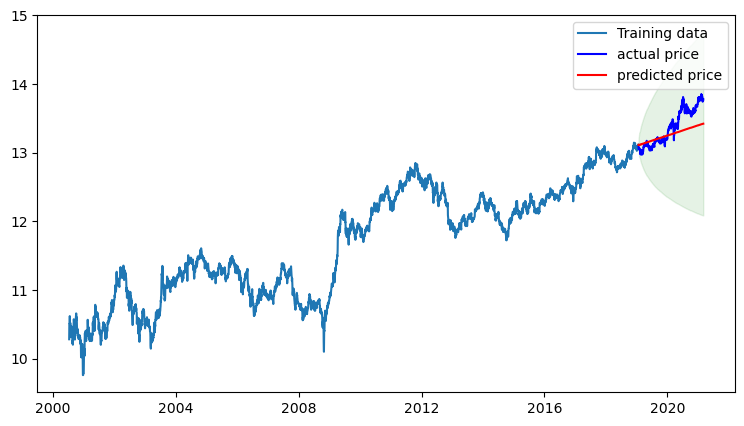

In [192]:
# Forecast : 결과가 fc에 담깁니다. 
# [[YOUR CODE]]
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)

# Make as pandas series
# [[YOUR CODE]]
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index) 

# Plot
# [[YOUR CODE]]
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='green', alpha=.10)
plt.legend(loc='best')
plt.show

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
 # [[YOUR CODE]]
mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE: ', mse)

mae =mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mse)
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  22543636272.447872
MAE:  111491.765375621
RMSE:  150145.38378667482
MAPE: 14.45%


# NCsoft

## STEP 1 : 시계열 데이터 준비

In [69]:
# csv -> dataframe
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/ncsoft.csv' 
ncsoft = pd.read_csv(dataset_filepath) 
print(type(ncsoft))
ncsoft.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-07-12,29266.666016,29266.666016,29266.666016,29266.666016,25356.447266,600.0
1,2000-07-13,32766.666016,32766.666016,32766.666016,32766.666016,28388.826172,277200.0
2,2000-07-14,36666.667969,36666.667969,34833.332031,36666.667969,31767.765625,499200.0
3,2000-07-17,36666.667969,36666.667969,36666.667969,36666.667969,31767.765625,0.0
4,2000-07-18,41000.000000,41000.000000,41000.000000,41000.000000,35522.125000,29700.0


In [70]:
# ind를 Date로 변경
ncsoft = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(ncsoft))
ncsoft.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-07-12,29266.666016,29266.666016,29266.666016,29266.666016,25356.447266,600.0
2000-07-13,32766.666016,32766.666016,32766.666016,32766.666016,28388.826172,277200.0
2000-07-14,36666.667969,36666.667969,34833.332031,36666.667969,31767.765625,499200.0
2000-07-17,36666.667969,36666.667969,36666.667969,36666.667969,31767.765625,0.0
2000-07-18,41000.000000,41000.000000,41000.000000,41000.000000,35522.125000,29700.0


In [71]:
# dataframe -> series
ncsoft = ncsoft['Close']
print(type(ncsoft))
ncsoft.head()

<class 'pandas.core.series.Series'>


Date
2000-07-12    29266.666016
2000-07-13    32766.666016
2000-07-14    36666.667969
2000-07-17    36666.667969
2000-07-18    41000.000000
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

In [72]:
ncsoft[ncsoft.isna()]

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

결측치 : Series([], Name: Close, dtype: float64)


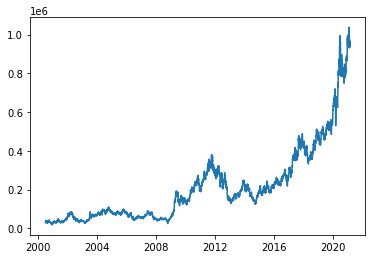

In [73]:
# 보간 기준은 'time'
ncsoft = ncsoft.interpolate(method='time')

print('결측치 :', ncsoft[ncsoft.isna()])

plt.plot(ncsoft)

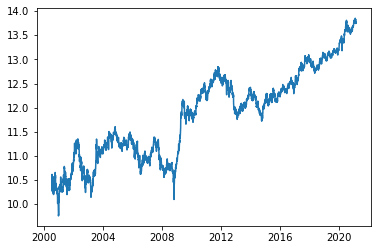

In [74]:
nc_log = np.log(ncsoft)
plt.plot(nc_log)

## STEP 3 : 시계열 안정성 분석

### 정성적 분석

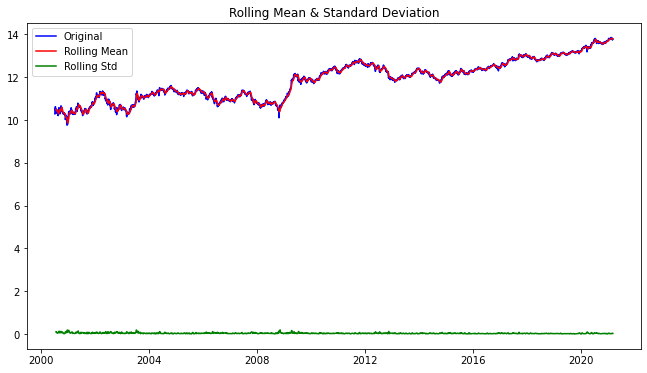

In [75]:
plot_rolling_statistics(nc_log, window=12)

### 정량적 분석

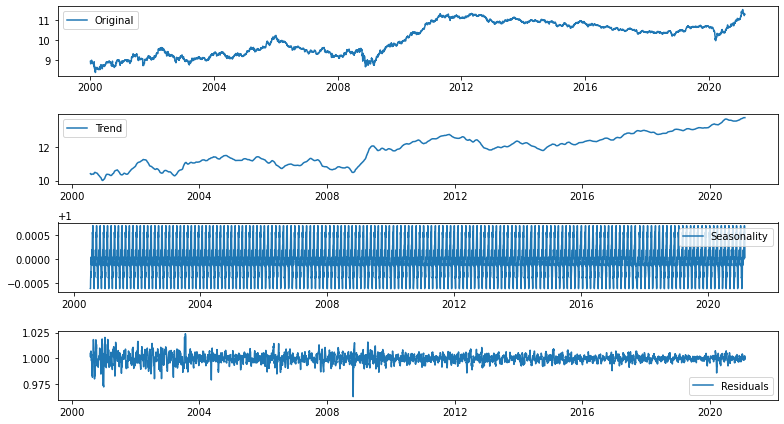

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(nc_log, model='multiplicative', period = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(11,6))
plt.subplot(411)
plt.plot(kia_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

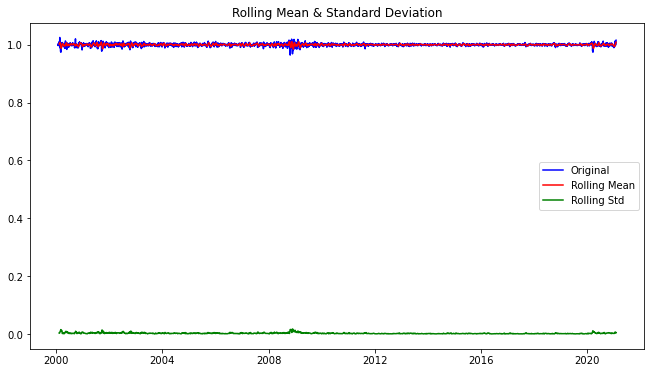

None
Results of Dickey-Fuller Test:
Test Statistic                -1.705423e+01
p-value                        8.029978e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.256000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


In [82]:
plt.rcParams['figure.figsize'] = (13,6)
print(plot_rolling_statistics(residual) )

residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

## STEP 4 : 학습, 테스트 데이터셋 생성

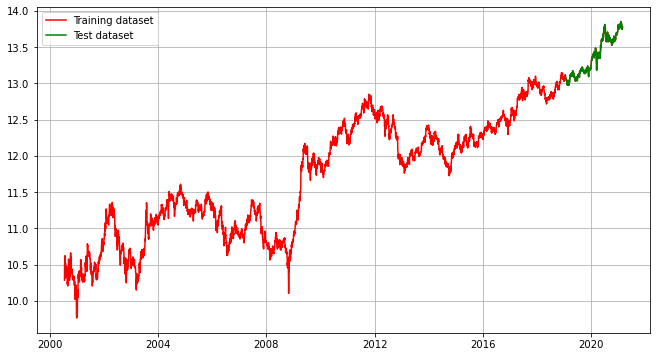

In [119]:
train_data, test_data = nc_log[:int(len(nc_log)*0.9)], nc_log[int(len(nc_log)*0.9):]
plt.figure(figsize=(11,6))
plt.grid(True)
plt.plot(nc_log, c='r', label='Training dataset')
plt.plot(test_data, c='g', label='Test dataset') # 겹쳐서 그림
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기

<function matplotlib.pyplot.show(close=None, block=None)>

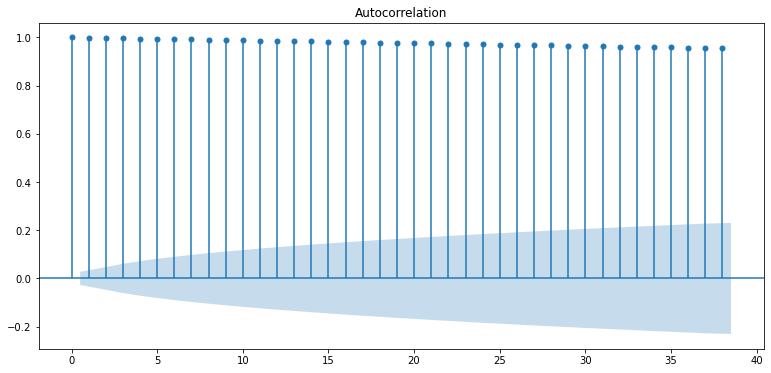

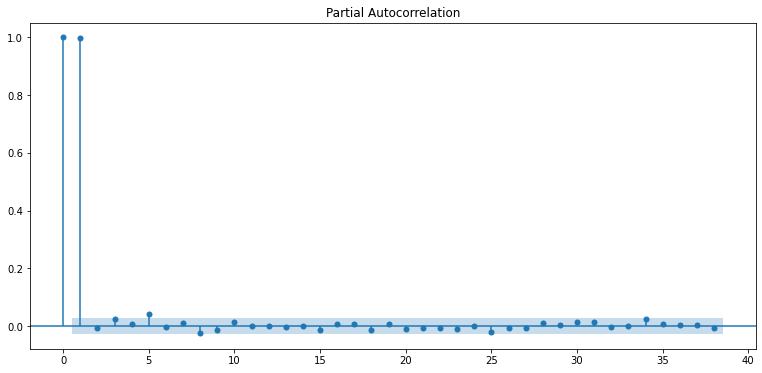

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(nc_log)  # ACF : Autocorrelation 그래프 그리기
plot_pacf(nc_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show

Results of Dickey-Fuller Test:
Test Statistic                  -19.695200
p-value                           0.000000
#Lags Used                       13.000000
Number of Observations Used    5169.000000
Critical Value (1%)              -3.431616
Critical Value (5%)              -2.862099
Critical Value (10%)             -2.567068
dtype: float64


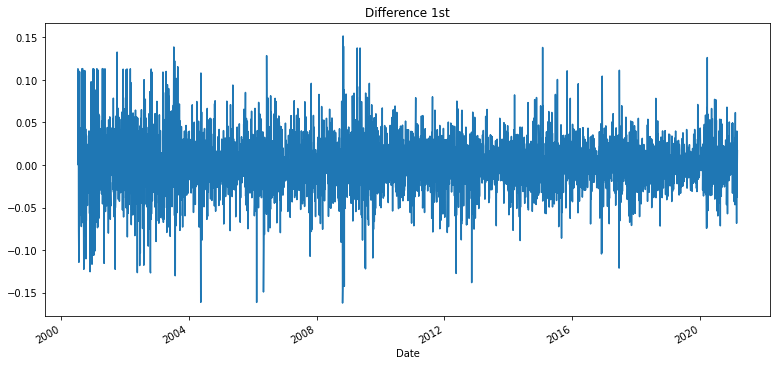

Results of Dickey-Fuller Test:
Test Statistic                  -19.695200
p-value                           0.000000
#Lags Used                       13.000000
Number of Observations Used    5169.000000
Critical Value (1%)              -3.431616
Critical Value (5%)              -2.862099
Critical Value (10%)             -2.567068
dtype: float64


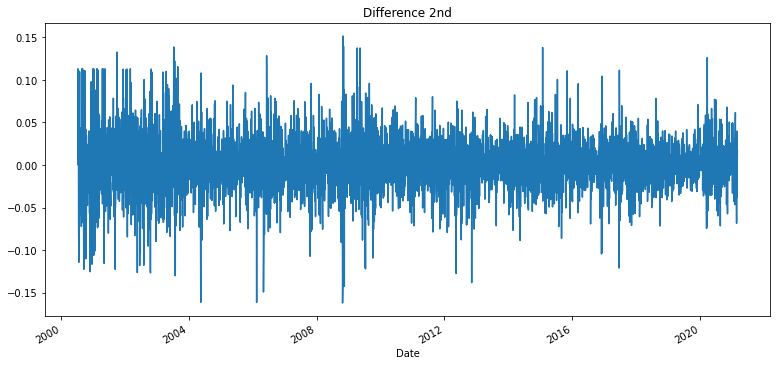

In [121]:
# 1차 차분  
diff_1 = nc_log.diff(periods=1).iloc[1:]
diff_1.plot(title ='Difference 1st')

augmented_dickey_fuller_test(diff_1)
plt.show()

# 2차 차분  
diff_2 = nc_log.diff(periods=1).iloc[1:]
diff_2.plot(title ='Difference 2nd')

augmented_dickey_fuller_test(diff_2)
plt.show()

In [181]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
# [[YOUR CODE]]
model = ARIMA(train_data, order=(9,2,9))
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                 4663
Model:                 ARIMA(9, 2, 9)   Log Likelihood                9410.277
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 04 Mar 2021   AIC                         -18780.554
Time:                        00:51:19   BIC                         -18651.606
Sample:                             2   HQIC                        -18735.200
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.299e-08   2.54e-06      0.017      0.987   -4.94e-06    5.03e-06
ar.L1.D2.Close    -0.6485        nan        nan        nan         nan         nan
ar.L2.D2.Close    -0.5299        nan

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<function matplotlib.pyplot.show(close=None, block=None)>

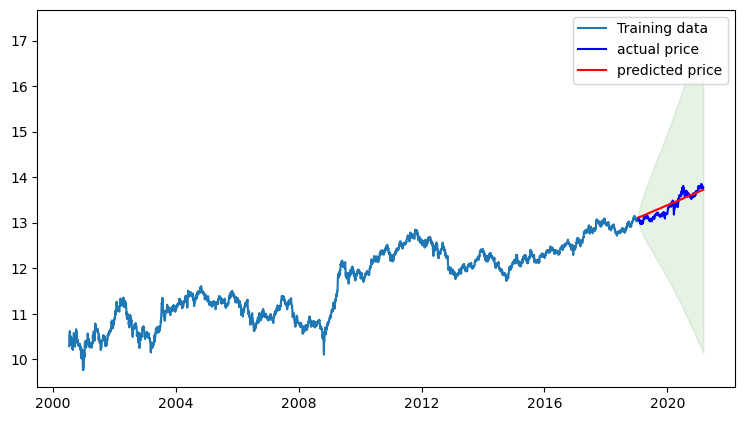

In [182]:
# Forecast : 결과가 fc에 담깁니다. 
# [[YOUR CODE]]
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)

# Make as pandas series
# [[YOUR CODE]]
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index) 

# Plot
# [[YOUR CODE]]
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='green', alpha=.10)
plt.legend(loc='best')
plt.show

In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
 # [[YOUR CODE]]
mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE: ', mse)

mae =mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mse)
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5458824494.575441
MAE:  62511.347075948426
RMSE:  73883.85814625169
MAPE: 10.12%


# Hyundai(20.03.04~21.03.04)

## STEP 1 : 시계열 데이터 준비

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/hyundai.csv'
ts = pd.read_csv(dataset_filepath)
print(type(ts))
ts.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-04,112000.0,114000.0,112000.0,113000.0,111211.085938,1319901
1,2020-03-05,115500.0,116000.0,113000.0,114000.0,112195.250000,1135241
2,2020-03-06,113000.0,113500.0,110000.0,110500.0,108750.664063,1746834
3,2020-03-09,110500.0,110500.0,110500.0,110500.0,108750.664063,0
4,2020-03-10,102500.0,105000.0,101000.0,102000.0,100385.226563,2491487


In [5]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close'] # 종가

ts.head()

Date
2020-03-04    113000.0
2020-03-05    114000.0
2020-03-06    110500.0
2020-03-09    110500.0
2020-03-10    102000.0
Name: Close, dtype: float64

## STEP 2 : 각종 전처리 수행

In [6]:
# 결측치 처리
ts=ts.interpolate(method='time')

ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [8]:
ts_log=np.log(ts)

## STEP 3 : 시계열 안정성 분석

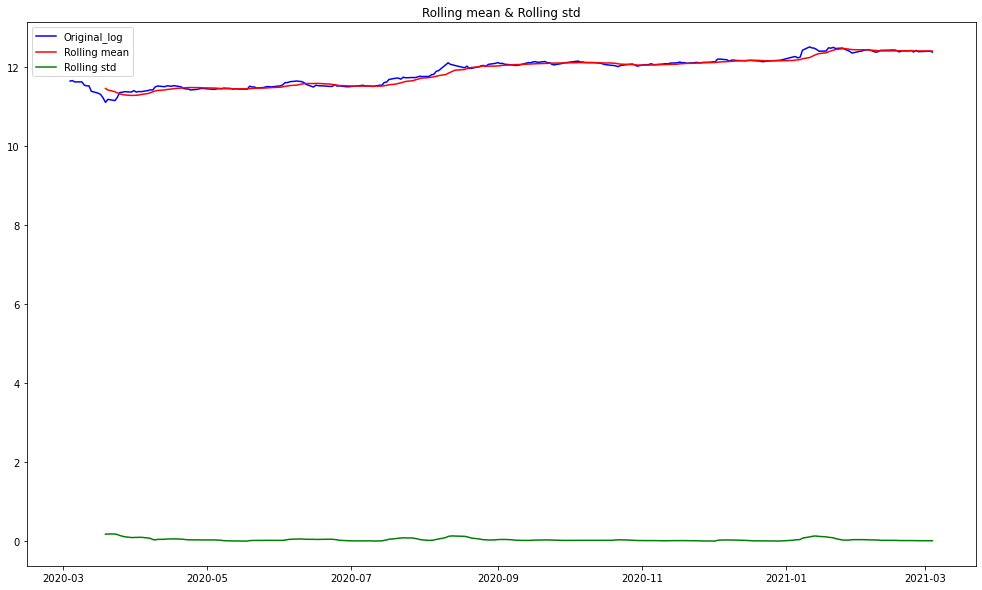

Results of Dickey-Fuller Test:
Test Statistic                  -0.301466
p-value                          0.925296
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


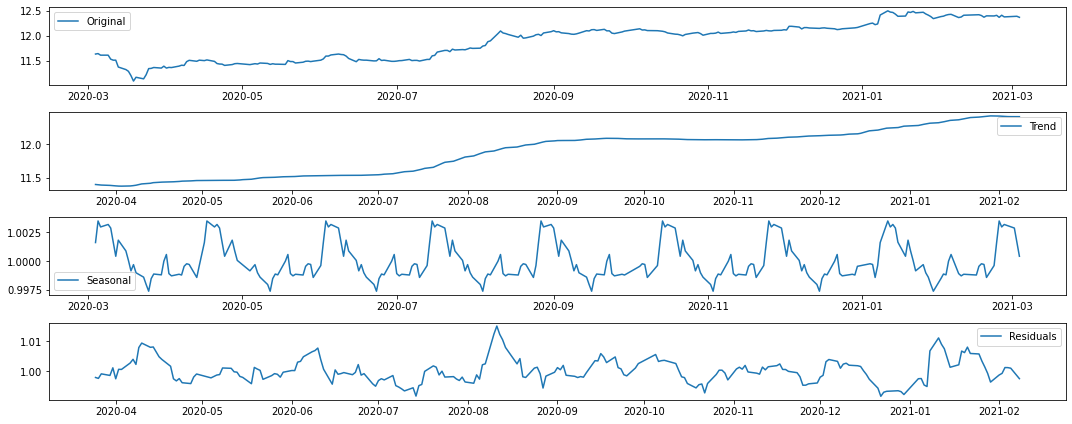

In [11]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30)  #  model='multiplicative' ???
# [[YOUR CODE]]
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.rcParams['figure.figsize'] = (15,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## STEP 4 : 학습, 테스트 데이터셋 생성

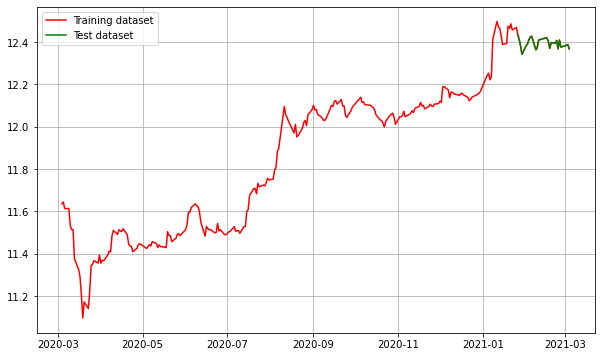

In [12]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)],ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='Training dataset')
plt.plot(test_data, c='g', label='Test dataset')
plt.legend()

## STEP 5 : 적정 ARIMA 모수 찾기

<function matplotlib.pyplot.show(close=None, block=None)>

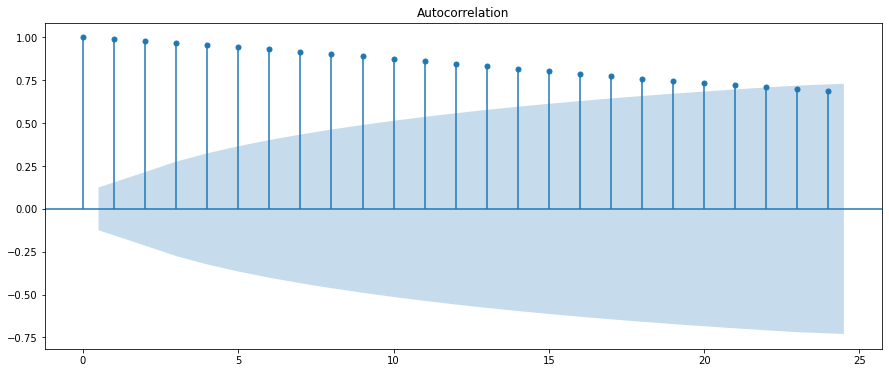

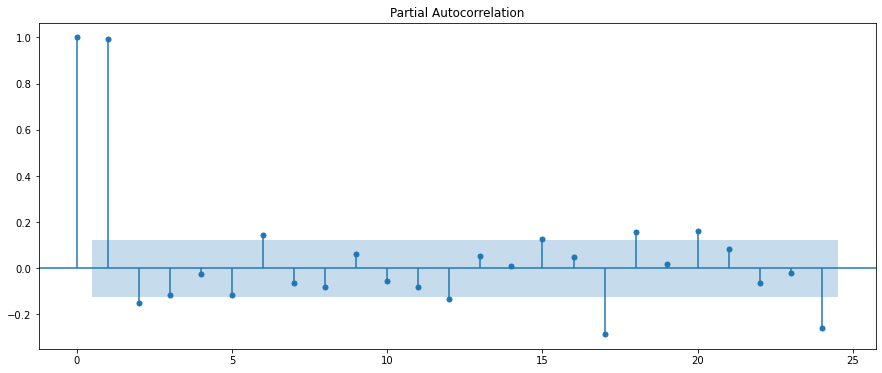

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)  # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show

Results of Dickey-Fuller Test:
Test Statistic                -1.369740e+01
p-value                        1.309031e-25
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


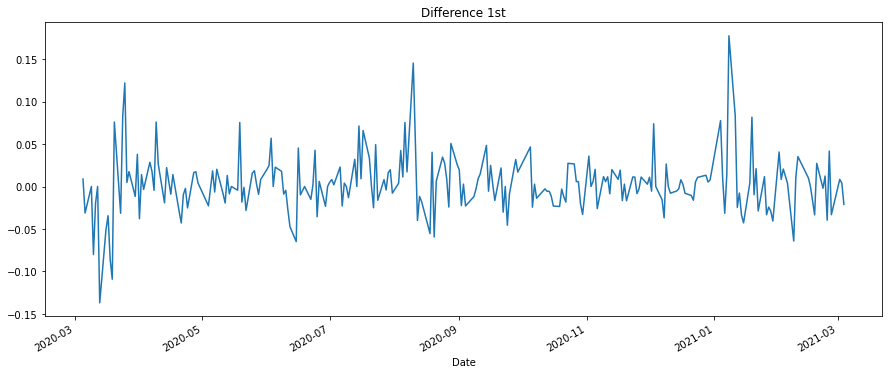

Results of Dickey-Fuller Test:
Test Statistic                -1.369740e+01
p-value                        1.309031e-25
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


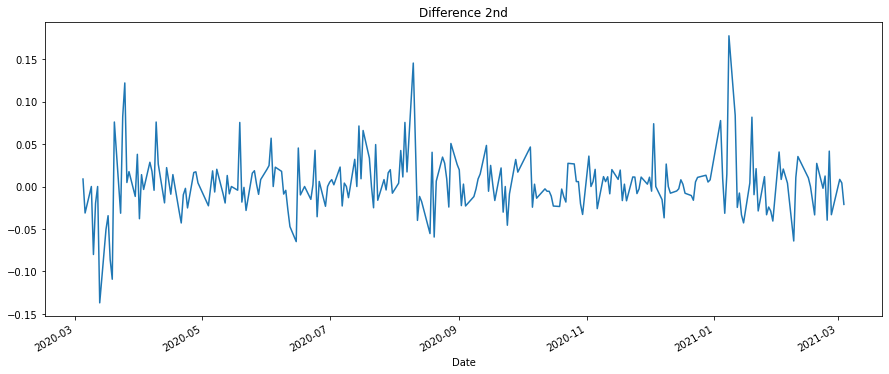

In [14]:
# 1차 차분  
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title ='Difference 1st')

augmented_dickey_fuller_test(diff_1)
plt.show()

# 2차 차분  
diff_2 = ts_log.diff(periods=1).iloc[1:]
diff_2.plot(title ='Difference 2nd')

augmented_dickey_fuller_test(diff_2)
plt.show()

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(4,2,0))
fitted_m = model.fit(disp=-1)
print(fitted_m.summary())

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  220
Model:                 ARIMA(4, 2, 0)   Log Likelihood                 408.481
Method:                       css-mle   S.D. of innovations              0.038
Date:                Thu, 04 Mar 2021   AIC                           -804.961
Time:                        20:26:09   BIC                           -784.599
Sample:                             2   HQIC                          -796.738
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.511e-05      0.001      0.073      0.942      -0.002       0.002
ar.L1.D2.Close    -0.6956      0.067    -10.350      0.000      -0.827      -0.564
ar.L2.D2.Close    -0.4461      0.081

<function matplotlib.pyplot.show(close=None, block=None)>

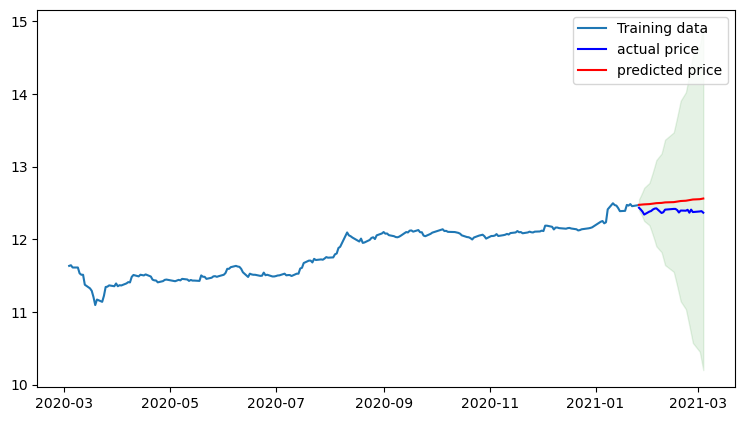

In [33]:
# Forecast : 결과가 fc에 담깁니다. 
# [[YOUR CODE]]
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)

# Make as pandas series
# [[YOUR CODE]]
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index) 

# Plot
# [[YOUR CODE]]
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r', label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='green', alpha=.10)
plt.legend(loc='best')
plt.show

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
 # [[YOUR CODE]]
mse = mean_squared_error(np.exp(test_data),np.exp(fc))
print('MSE: ', mse)

mae =mean_absolute_error(np.exp(test_data),np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mse)
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc)-np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1057787640.5931488
MAE:  30941.047020698163
RMSE:  32523.64740605132
MAPE: 12.89%


# 루브릭

평가문항
1. 시계열의 안정성이 충분히 확인되었는가?  
   플로팅과 adfuller 메소드가 모두 적절히 사용되었음  
   ->ok
   
   

2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?  
   p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨  
   -> p,q 선택의 근거가 많이 부족하지만 결과가 잘나와서 역으로 생각해볼 수 있다.
   
   

3. 예측 모델의 오3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨차율이 기준 이하로 정확하게 나왔는가?  
   3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨  
   -> 반올림 했을때 모두 10%가 나왔다.

# 회고

## 어려웠던 점 

* 오랜만에 보는 통계에 대한 이론 내용이 많이 나와서 어려웠다.  
  분산은 알고 있지만, 
  공분산(Covariance), 상관계수(Correlation), 자기공분산(Autocovariance), 자기상관계수(Autocorrelation)이라는 개념  
  
* 적정 모수를 찾는 과정이 잘 이해되지 않았다.  
  생각해 본 방안 -> 테스트 데이터가 증가하거나 감소하는 MA의 영향을 크게 받느다고 생각해서 q를 크게 해주고  
                 테스트 데이터가 평균을 유지하는 모양이면 AR의 영향이라고 생각해서 p를 크게 해줬다.  
                